<a href="https://colab.research.google.com/github/pranjalrawat007/MacroTheory/blob/main/Optimal_Growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Log Utility, Cobb Douglas Technology and Full Depreciation



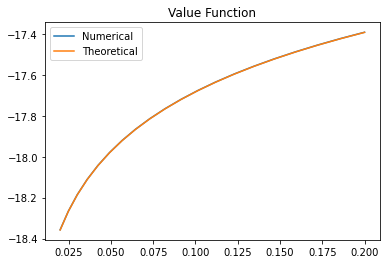

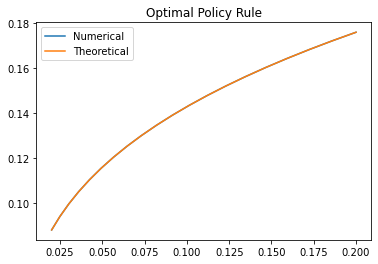

In [ ]:
import numpy as np
from numpy import log, linspace, zeros, interp, sqrt, array, ones
from scipy.interpolate import PchipInterpolator
from scipy.optimize import minimize, minimize_scalar
import matplotlib.pyplot as plt

# Problem Params
k0 = 0.2;
beta = 0.95;
alpha = 0.3;
utility = lambda c: log(c)

prodn = lambda k: k**alpha

# Hyperparams
grid = 20
maxIter = 200
min_state = k0/10
exp = 2 # oversampling

# Arrays
state = linspace(min_state**(1/exp),k0**(1/exp),grid)**exp;
value = zeros((maxIter, grid))
policy = zeros((maxIter, grid))
iter = 1

# Value Function Iteration
while (iter <= maxIter-1):
  oldvaluefn = PchipInterpolator(state, value[iter-1, :], axis=0,extrapolate=True)
  for i, k in enumerate(state):    
    def w(kp):
      #oldval = interp(x, state, value[iter-1, :]) 
      return - utility(prodn(k) - kp) - beta*oldvaluefn(kp)
    res = minimize_scalar(w, bounds=(0, prodn(k)), method='bounded')
    value[iter, i] = -res.fun
    policy[iter, i] = res.x
  iter = iter + 1;

# Analytical Solutions
def value_actual(k):
  a = alpha*beta 
  b = 1-alpha*beta
  c = 1/(1-beta)
  p0 = c*((a/b)*log(a)+log(b))
  p1 = alpha/b
  return p0 + p1*log(k)

def kp_actual(kp):
  return alpha*beta*kp**alpha

# Verification
plt.figure(1)
plt.plot(state, value[iter-1, :], label = 'Numerical' ) # numerical
plt.plot(state, value_actual(state), label = 'Theoretical') # theoretical
plt.title('Value Function')
plt.legend()
plt.figure(2)
plt.plot(state, policy[iter-1,:], label = 'Numerical' ) # numerical
plt.plot(state, kp_actual(state), label = 'Theoretical') # theoretical
plt.title('Optimal Policy Rule')
plt.legend()
plt.show()


# Partial Depreciation


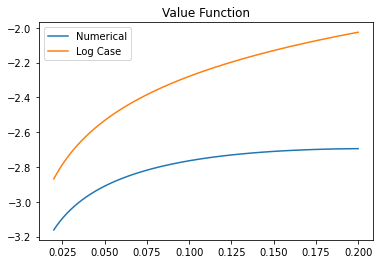

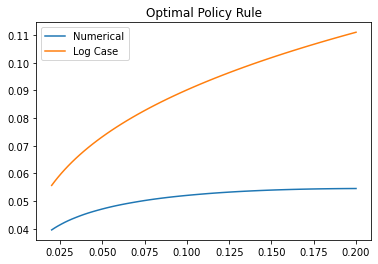

In [ ]:
import numpy as np
from numpy import log, linspace, zeros, interp, sqrt, array
from scipy.interpolate import PchipInterpolator
from scipy.optimize import minimize, minimize_scalar
import matplotlib.pyplot as plt

# Problem Params
k0 = 0.2;
beta = 0.6;
alpha = 0.3;
delta = 0.1;
utility = lambda c: log(c)
prodn = lambda k: k**alpha - k*(1-delta)

# Hyperparams
grid = 50
maxIter = 50
min_state = k0/10
exp = 2 # oversampling

# Arrays
state = linspace(min_state**(1/exp),k0**(1/exp),grid)**exp;
value = zeros((maxIter, grid));
policy = zeros((maxIter, grid));
iter = 1;

# Value Function Iteration
while (iter <= maxIter-1):
  oldvaluefn = PchipInterpolator(state, value[iter-1, :], axis=0,extrapolate=True)
  for i, k in enumerate(state):    
    def w(kp):
      #oldval = interp(x, state, value[iter-1, :]) 
      return - utility(prodn(k) - kp) - beta*oldvaluefn(kp)
    res = minimize_scalar(w, bounds=(0, prodn(k)), method='bounded')
    if np.isfinite(-res.fun):
      value[iter, i] = -res.fun
      policy[iter, i] = res.x
  iter = iter + 1;

# Analytical Solutions
def value_actual(k):
  a = alpha*beta 
  b = 1-alpha*beta
  c = 1/(1-beta)
  p0 = c*((a/b)*log(a)+log(b))
  p1 = alpha/b
  return p0 + p1*log(k)

def kp_actual(kp):
  return alpha*beta*kp**alpha

# Verification
plt.figure(1)
plt.plot(state, value[iter-1, :], label = 'Numerical' ) # numerical
plt.plot(state, value_actual(state), label = 'Log Case') # theoretical
plt.title('Value Function')
plt.legend()
plt.figure(2)
plt.plot(state, policy[iter-1,:], label = 'Numerical' ) # numerical
plt.plot(state, kp_actual(state), label = 'Log Case') # theoretical
plt.title('Optimal Policy Rule')
plt.legend()
plt.show()


# Stochastic Growth

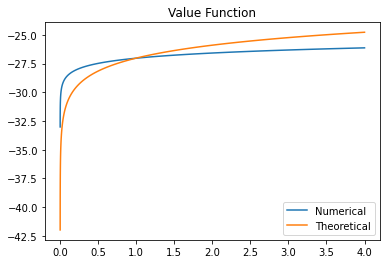

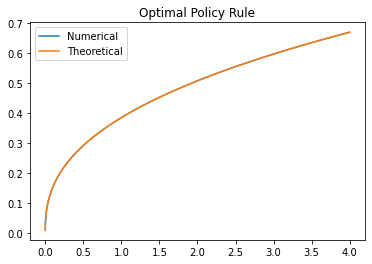

In [ ]:
import numpy as np
from numpy.random import normal
from numpy import log, linspace, zeros, interp, sqrt, array, exp, mean
from scipy.interpolate import PchipInterpolator
from scipy.optimize import minimize, minimize_scalar
import matplotlib.pyplot as plt

# Problem Params
k0 = 4
beta = 0.96
alpha = 0.4
mu = 0
sigma = 0.1
utility = lambda c: log(c)
prodn = lambda k: k**alpha

# Hyperparams
grid = 120
shockSize = 250
maxIter = 1000
min_state = 1e-4
exp = 3 # oversampling
np.random.seed(1234)

# Arrays
state = linspace(min_state**(1/exp),k0**(1/exp),grid)**exp;
value = zeros((maxIter, grid));
policy = zeros((maxIter, grid));
iter = 1;

# Value Function Iteration
while (iter <= maxIter-1):
  oldvaluefn = PchipInterpolator(state, value[iter-1, :], axis=0,extrapolate=True)
  shocks = np.exp(normal(mu,sigma,shockSize))
  for i, k in enumerate(state):    
    def w(kp):
      #oldval = interp(x, state, value[iter-1, :]) 
      return - utility(prodn(k) - kp) - mean(beta*oldvaluefn(kp*shocks))
    res = minimize_scalar(w, bounds=(0, prodn(k)), method='bounded')
    if np.isfinite(-res.fun):
      value[iter, i] = -res.fun
      policy[iter, i] = res.x
  iter = iter + 1;

# Analytical Solutions
def value_actual(k):
  a = alpha*beta 
  b = 1-alpha*beta
  c = 1/(1-beta)
  d = 1/(1-alpha)
  x0 = log(b)*c
  x1 = (mu+alpha*log(a))*d*(c-1/b)
  x2 = log(k)/b
  return x0 + x1 + x2

def kp_actual(kp):
  return alpha*beta*kp**alpha

# Verification
plt.figure(1)
plt.plot(state, value[iter-1, :], label = 'Numerical' ) # numerical
plt.plot(state, value_actual(state), label = 'Theoretical') # theoretical
plt.title('Value Function')
plt.legend()
plt.figure(2)
plt.plot(state, policy[iter-1,:], label = 'Numerical' ) # numerical
plt.plot(state, kp_actual(state), label = 'Theoretical') # theoretical
plt.title('Optimal Policy Rule')
plt.legend()
plt.show()
